In [30]:
import numpy as np
from scipy import stats
from scipy.stats import gamma, lognorm, powerlognorm
import matplotlib.pyplot as plt

In [3]:
## Extract data with the high resolution \tilde{v} distribution
with open("../data/VTil.dat","r") as file:
    lines = file.readlines()
    
    v = []
    v_dist = []
    for line in lines:
        vel, dist = line.strip().split(" ")
        v.append(float(vel))
        v_dist.append(float(dist))

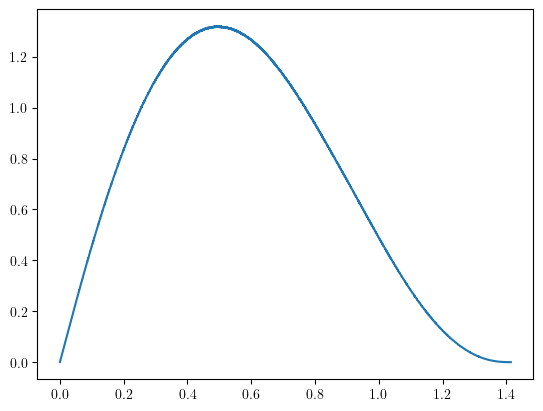

In [5]:
plt.plot(v, v_dist)

In [8]:
shape, loc, scale = gamma.fit(v_dist)

In [9]:
random_numbers = gamma.rvs(shape, loc=loc, scale=scale, size=1000)

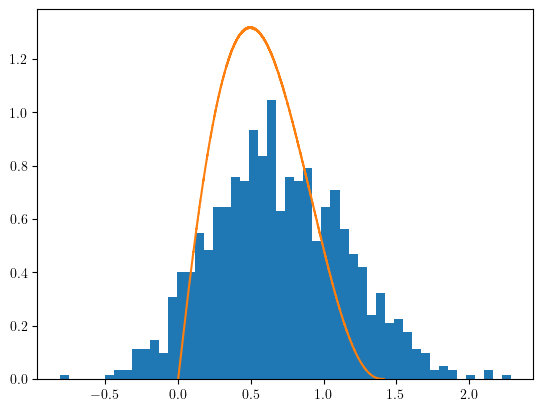

In [13]:
plt.hist(random_numbers, bins=50, density=True)
plt.plot(v,v_dist)

In [20]:
shape, loc, scale = lognorm.fit(v_dist)

In [21]:
dist = lognorm.rvs(shape, loc, scale, 1000)

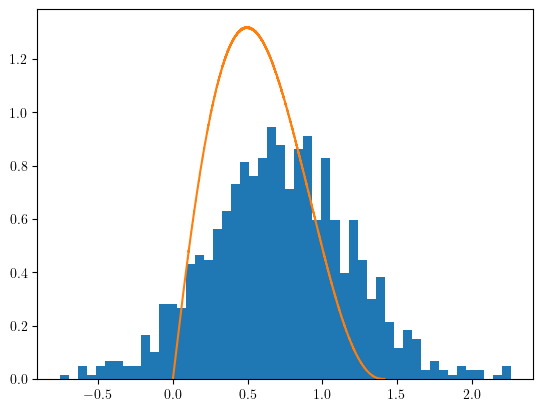

In [24]:
plt.hist(dist, bins=50, density=True)
plt.plot(v, v_dist)

In [36]:
arg1, arg2, loc, scale = powerlognorm.fit(v_dist)

In [38]:
dist = powerlognorm.rvs(arg1, arg2, loc, scale, size=1000)

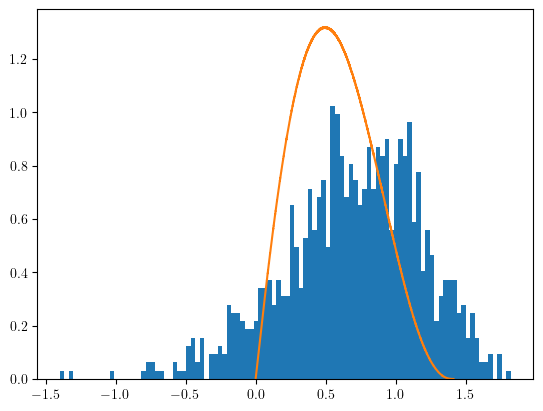

In [44]:
_=plt.hist(dist, bins=100, density=True)
plt.plot(v,v_dist)

In [64]:
from scipy.special import gamma

def gamma_dist(x, a, b):
    return b*(((b*x)**(a-1))*np.exp(-x*b))/gamma(a)

In [65]:
from scipy.optimize import curve_fit

In [66]:
popt, pcov = curve_fit(gamma_dist, v, v_dist)

In [67]:
x = np.linspace(0,np.sqrt(2),1000)

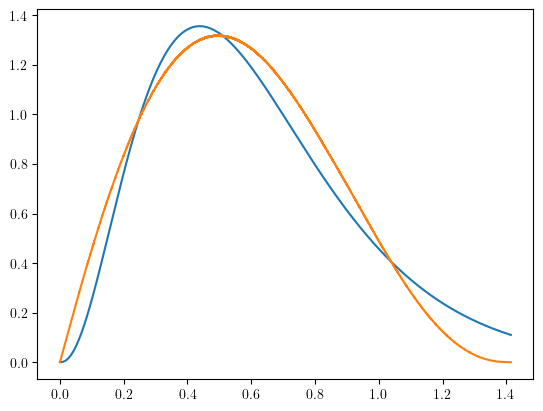

In [68]:
plt.plot(x, gamma_dist(x, *popt))
plt.plot(v, v_dist)

In [70]:
pcov

array([[0.00015955, 0.00028297],
       [0.00028297, 0.00056108]])